In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


    



In [3]:
mcd = pd.read_csv("mcdonalds.csv")

In [4]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
# CHECKING ALL THE COLUMNS FOR UNIQUE VALUES SO THAT WE CAN PERFORM CATEGORICAL TRANSFORMATION 
# K MEANS DOSENT TAKE CATEGORICAL VALUES IT ONLY WORKS WITH NUMERICAL VALUES 
# ANY OUTLIERS SUCH AS IN AGE SHOULD BE TAKEN CARE OF BECAUSE K MEANS IS SENSITIVE TO OUTLIERS 
# USING ONE HOT OR LABEL ENCODING TO CHANGE ALL THE BINARY CATEGORIES 
# MAKING BINS FOR LIKE COLUMNS IN TERMS OF ADDING LEVELS TO IT 


In [6]:
# VISIT FREQUENCY COMBINES WITH LIKENESS AND CONVINIENCE AND CHEAPNES CAN GIVE US AN IDEA OF INCOME LEVEL OF THE CLUSTER . 

## DATA CLEANING 

In [7]:
mcd.isnull().sum()


#No NULL VALUE FOUND IN ANY COLUMN 


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
mcd.Like.value_counts()

# AS WE CAN SEE DIFFERENT LEVEL OF RATING 
# WE ARE GOING TO CHANGE THIS INTO SOMETHING MORE AFFORDABLE AND READABLE 

# 1. CONVERT ALL TO NUMERIC VALUES FROM RANGE OF -5 TO 5 
# 2. MAKE BINS - 0,1 - HATE | 2,3 - NUETRAL | 4,5 - LOVE 
# 3. ADD LEVEL 1,2,3 TO HATE , NUETRAL , LOVE 




+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [9]:
mcd.Like=mcd.Like.replace('I hate it!-5','-5')

In [10]:
mcd.Like=mcd.Like.replace('I love it!+5','+5') 

In [11]:
for i in mcd['Like']:
    
    if int(i)<=1 :
        mcd.Like=mcd.Like.replace(i,'HATE')
    
    elif int(i)==2 or int(i)==3 :
        mcd.Like = mcd.Like.replace(i,'NUETRAL')
    
    elif int(i)==4 or int(i)==5 : 
        mcd.Like = mcd.Like.replace(i, 'LOVE')   
    
        

In [30]:
#ADD LEVELS TO THE LIKENESS OF MCDONALDS


level = mcd.Like.unique()

level

array(['HATE', 'NUETRAL', 'LOVE'], dtype=object)

In [33]:
Likeness = mcd.Like

In [34]:
order = level[[0,1,2]]

Likeness = pd.Categorical(Likeness,categories=order,ordered=True)

In [13]:
mcd.Like.value_counts()

HATE       734
NUETRAL    416
LOVE       303
Name: Like, dtype: int64

In [36]:
mcd.Like = Likeness



In [39]:
mcd.Like.dtype

CategoricalDtype(categories=['HATE', 'NUETRAL', 'LOVE'], ordered=True)

In [14]:
mcd = mcd.replace('Yes',1)

In [15]:
mcd = mcd.replace('No',0)

In [16]:
mcd.Gender = mcd.Gender.replace('Female',0)
mcd.Gender = mcd.Gender.replace('Male',1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf73f271f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf73f27850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf73f0aee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf73f27d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf745d8040>],
 'means': []}

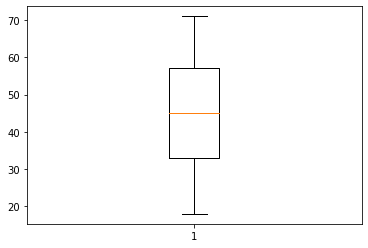

In [17]:
plt.boxplot(mcd.Age)

In [18]:
mcd.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,1.000000


In [19]:
mcd 

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,HATE,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,NUETRAL,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,HATE,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,LOVE,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,NUETRAL,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,HATE,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,NUETRAL,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,NUETRAL,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,LOVE,41,Every three months,1


In [20]:
mcd.VisitFrequency.value_counts()


# WE CAN CLASSIFY THIS COLUMN BY THE NUMBER OF VISITS EVERY YEAR 
# FOR EXAMPLE PERSON GOING ONCE EVERY MONTH WILL MAKE ATLEAST 12 VISITS PER YEAR 
# SIMILARLY WE CAN DO THIS FOR THE REST OF THE CATEGORIES AS WELL TO MAKE THE SCALE OF THE DATA EVEN 


Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [22]:
# MAKE A NEW COLUMN 
# VISIT EVERY YEAR 

1.  12 
2.  4 
3.  1 
4.  48 
5.  0 
6.  48


> 12 
< 12 

12 Times per year


SyntaxError: invalid syntax (126562573.py, line 4)

In [23]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,HATE,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,NUETRAL,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,HATE,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,LOVE,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,NUETRAL,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,HATE,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,NUETRAL,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,NUETRAL,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,LOVE,41,Every three months,1


In [ ]:
# VISUALIZATION FOR AGE 



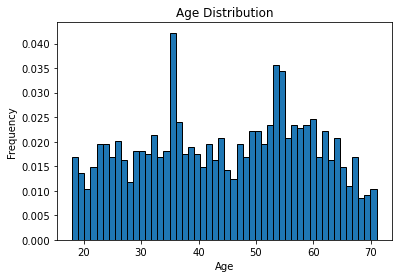

In [41]:
plt.hist(mcd.Age , bins = 50 , edgecolor= 'black', density = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

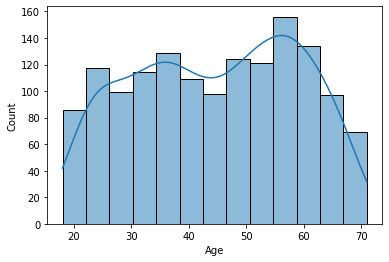

In [42]:
sns.histplot(mcd , x= "Age",kde='True')
plt.show()

In [52]:
mcd.fast.dtype


dtype('int64')

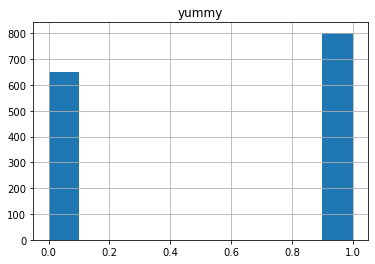

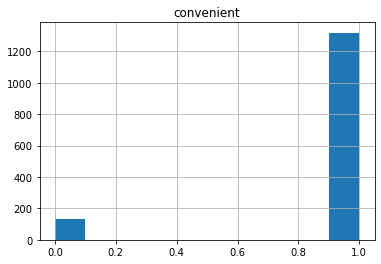

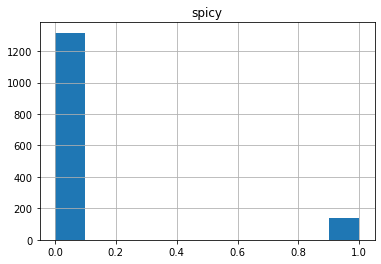

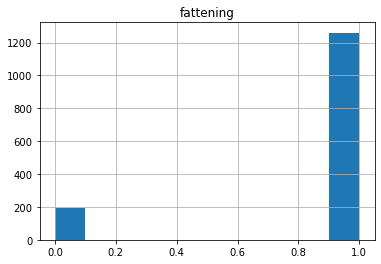

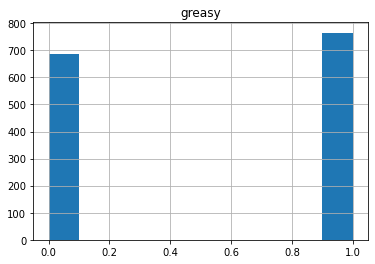

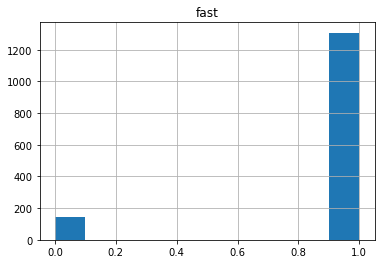

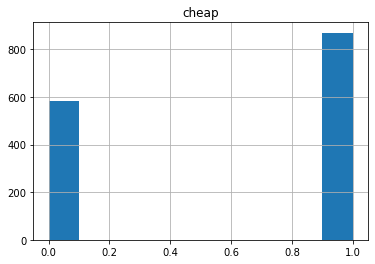

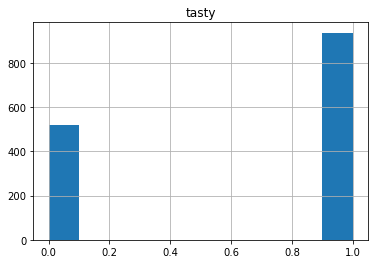

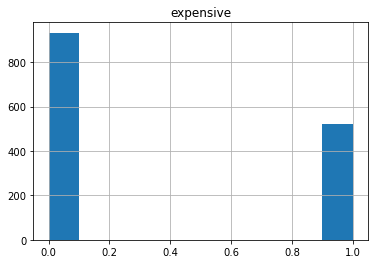

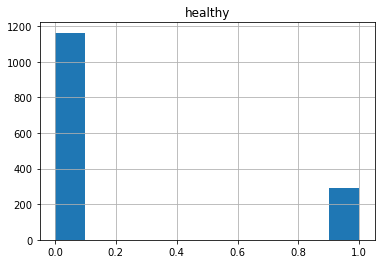

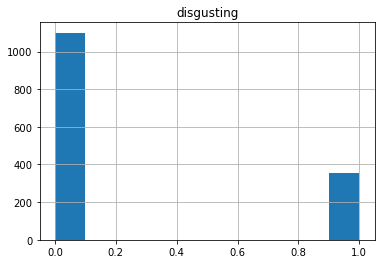

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [59]:
for i in mcd :
    mcd.hist(i)
    plt.show()
    

In [ ]:
# Standardising Values 
# Feeding to PCA 
# Applying Kmeans 

                

In [60]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,HATE,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,NUETRAL,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,HATE,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,LOVE,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,NUETRAL,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,HATE,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,NUETRAL,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,NUETRAL,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,LOVE,41,Every three months,1


In [76]:
cat = mcd.iloc[:,0:11]

In [77]:
cat

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [81]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 


pca_data = preprocessing.scale(cat)

pca = PCA(n_components=11)

pc = pca.fit_transform(cat)

names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']

pf = pd.DataFrame(data=pc,columns=names)

pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


1. each data is represented by values along pc 

2. these values retain most of the information from original dataset 

3. Explained Variance Ratio - The explained variance ratio provides insight into the relative importance or contribution of each principal component in capturing the variability in the dataset. Components with higher explained variance ratios capture more significant patterns or structures in the data. By examining these ratios, you can identify the principal components that explain the majority of the variance and select a suitable number of components for dimensionality reduction or analysis.

4. How to choose number of pca ? > Choosing the appropriate number of principal components depends on the specific problem and trade-offs between dimensionality reduction and information retention. You can consider using scree plots, cumulative explained variance plots, or domain knowledge to guide the selection process.

In [82]:
pca.explained_variance_ratio_

# pc1 = 29% , pc2 = 19% , pc3 = 13% , pc4 = 8% 

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [83]:
# Large absolute values --- > Stronger Correlations between features and pc 

# sign of the component indicates the direction of pc 

# usage--> component array interprets importance and contribution of original feature to the pc 

# help identify which feature has most influence on structure or pattern in data . 


pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

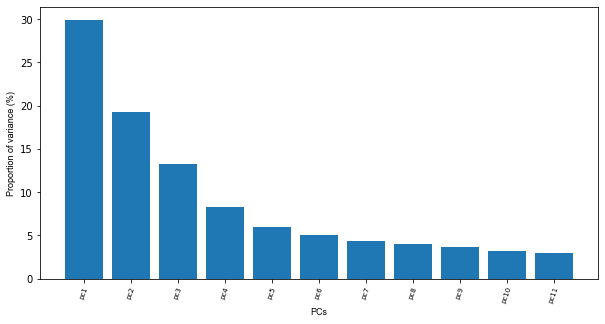

In [89]:
from bioinfokit.visuz import cluster 
cluster.screeplot(obj=[names,pca.explained_variance_ratio_],show= True , dim =(10,5))

In [ ]:
# USING KMEANS FOR SEGMENTATION 

D:\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


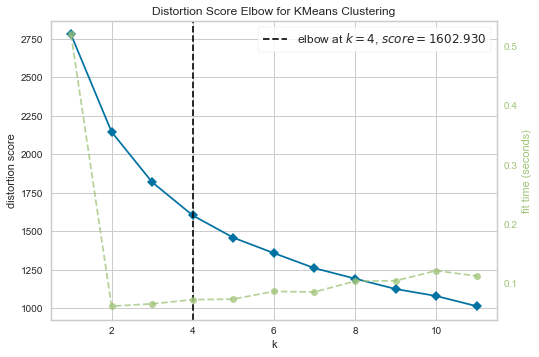

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer 

model = KMeans()

visualizer = KElbowVisualizer(model , k=(1,12)).fit(cat)
visualizer.show()

In [109]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0).fit(cat)
mcd['cluster_num']=kmeans.labels_

In [110]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

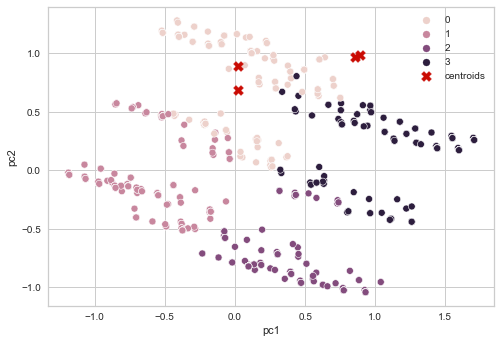

In [123]:
sns.scatterplot(data=pf,x="pc1",y='pc2',hue=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=100, label="centroids")
plt.legend()
plt.show()
